In [ ]:
es diferente el número de valoraciones si el curso es pagado o no

In [2]:
import pandas as pd

data=pd.read_csv('udemy_courses_dataset.csv')
data


,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [48]:
pip install fitter

   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ------- -------------------------------- 2.9/15.5 MB 15.2 MB/s eta 0:00:01
   -------------- ------------------------- 5.8/15.5 MB 14.7 MB/s eta 0:00:01
   ------------------------ --------------- 9.4/15.5 MB 15.5 MB/s eta 0:00:01
   -------------------------------- ------- 12.6/15.5 MB 15.2 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_continuous_distns.py:6554: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce


Mejor distribución: beta
Parámetros: (np.float64(0.6062736129649037), np.float64(0.9921910509055593), np.float64(-1.740427898558937e-27), np.float64(202.5832648612008))


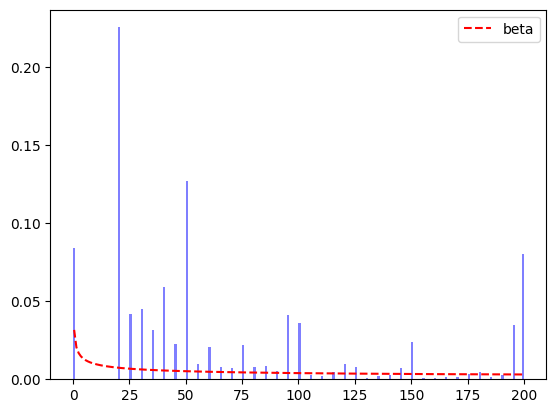

In [ ]:
# PARA VER QUÉ DISTRIBUCIÓN ES LA MÁS PARECIDA A LOS DATOS

import scipy.stats as st
import matplotlib.pyplot as plt
# Definir la función best_fit_distribution
def best_fit_distribution(data, bins=200, plot=False):
    DISTRIBUTIONS = [st.norm, st.expon, st.gamma, st.weibull_min, st.weibull_max, st.beta, st.lognorm]

    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    best_distribution = None
    best_params = None
    best_sse = np.inf

    for distribution in DISTRIBUTIONS:
        try:
            params = distribution.fit(data)
            pdf = distribution.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
            sse = np.sum(np.power(y - pdf, 2.0))

            if best_sse > sse > 0:
                best_distribution = distribution
                best_params = params
                best_sse = sse
        except Exception:
            pass
    if best_distribution:
        print(f"Mejor distribución: {best_distribution.name}")
        print(f"Parámetros: {best_params}")

        if plot:
            plt.hist(data, bins=bins, density=True, alpha=0.5, color='b')
            pdf = best_distribution.pdf(x, *best_params[:-2], loc=best_params[-2], scale=best_params[-1])
            plt.plot(x, pdf, 'r--', label=f'{best_distribution.name}')
            plt.legend()
            plt.show()

    return best_distribution, best_params

# Llamada a la función con una columna específica
mejor_distribucion, parametros = best_fit_distribution(data["price"], plot=True)



In [51]:
from fitter import Fitter

f = Fitter(data)
f.fit()
f.summary()


TypeError: '<=' not supported between instances of 'int' and 'str'

In [3]:
# Describimos las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


En PRICE : no sigue una D. Normal ( media y mediana no coinciden, histograma,boxplot y  densityplot no són simétricas)
Hemos visto que hay muchos más valores a la derecha que a la izq= hay más precios altos que bajos.
Podría seguir una D. Poisson ( por los valores atípicos)

en NUM_SUBSCRIBERS :  no sigue una Normal, media y mediana muy diferentes, y el histograma y boxplot no muestran una forma d enormal. 
Podría seguir una D.Poisson ( por muchos outliers)

en NUM_REVIEWS : LO MISMO

NUM_LECTURES :  LO MISMO

# Las variables categóricas (is_paid, level...) no siguen una Normal, y hemos estudiado distintos gráficos





In [43]:
data['level'].describe()

count           3678
unique             4
top       All Levels
freq            1929
Name: level, dtype: object

In [4]:
# Describimos la variable price ( v.cuantitativa)
data['price'].describe()

count    3678.000000
mean       66.049483
std        61.005755
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

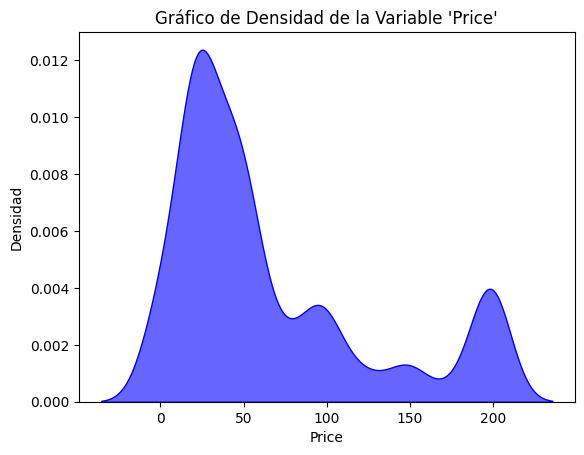

In [45]:
# Visualizamos variable price en DensityPlot
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de densidad para la variable 'price'
sns.kdeplot(data=data, x='price', fill=True, color="blue", alpha=0.6)
plt.title("Gráfico de Densidad de la Variable 'Price'")
plt.xlabel("Price")
plt.ylabel("Densidad")
plt.show()



In [34]:
# Visualizamos PRICE en histograma
data["is_paid"].plot(kind='hist',bins=20, linewidth=0.5, edgecolor="white", title = "Histograma con pandas", xlim=(0, 30))

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\hist.py:99: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bins = np.histogram(values, bins=bins, range=self._bin_range)


TypeError: no numeric data to plot

#

<Axes: >

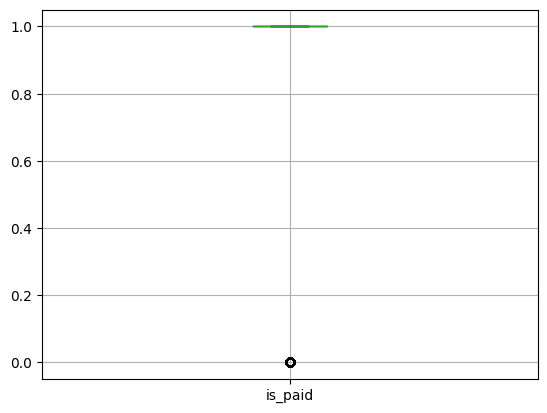

In [35]:
# Visualizamos PRICE en boxplot
data.boxplot(column="is_paid")

NUM_SUBSCRIBERS: media!=mediana

In [36]:
# Visualizamos PRICE en histograma
data["is_paid"].plot(kind='hist',bins=40, linewidth=0.5, edgecolor="white", title = "Histograma con pandas", xlim=(0, 80))

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\hist.py:99: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bins = np.histogram(values, bins=bins, range=self._bin_range)


TypeError: no numeric data to plot

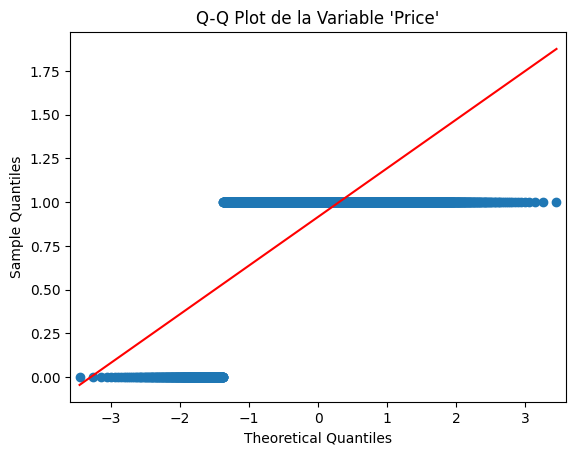

In [37]:
# PROBAR QQPLOT
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q plot para la variable 'price'
sm.qqplot(data['is_paid'], line='s')
plt.title("Q-Q Plot de la Variable 'Price'")
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_24420\3174130952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='is_paid', palette='viridis')


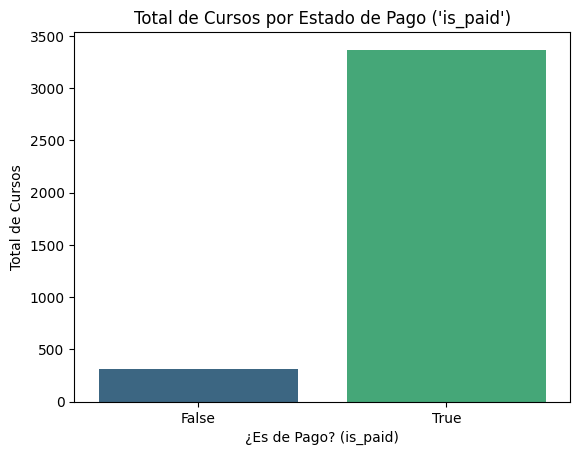

In [42]:

import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras: total de cursos por 'is_paid'
sns.countplot(data=data, x='is_paid', palette='viridis')
plt.title("Total de Cursos por Estado de Pago ('is_paid')")
plt.xlabel("¿Es de Pago? (is_paid)")
plt.ylabel("Total de Cursos")
plt.show()


In [ ]:
# IS_PAID seria una variable bernoulli, ya que no sigue una d.normal, y el barplot no muestra que los sucesos tienen las mimsmas probabilidades
#(hya mucho +TRUE que false)

In [14]:
# Describimos variables cuantitativas
data['num_subscribers'].describe()

count      3678.000000
mean       3197.150625
std        9504.117010
min           0.000000
25%         111.000000
50%         911.500000
75%        2546.000000
max      268923.000000
Name: num_subscribers, dtype: float64

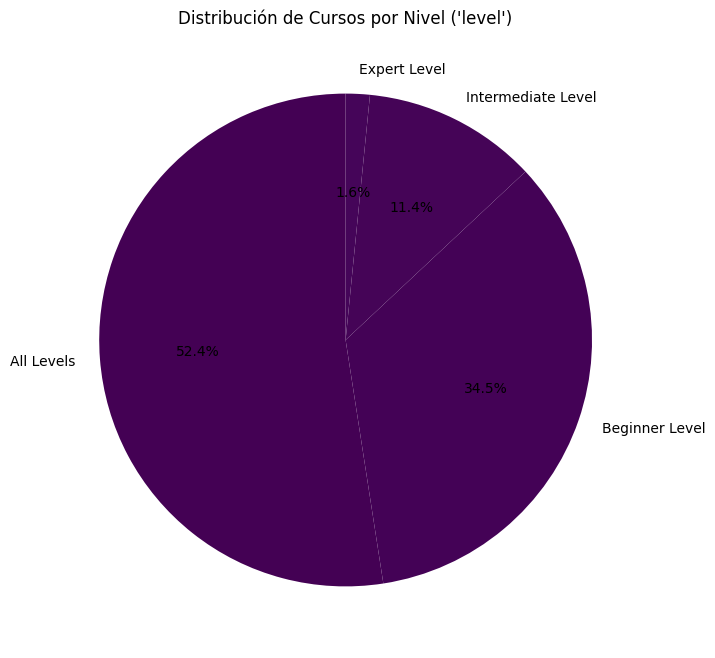

In [47]:
# PIE CHART

level_counts = data['level'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.viridis.colors)
plt.title("Distribución de Cursos por Nivel ('level')")
plt.show()

In [9]:
data['num_reviews'].describe()

count     3678.000000
mean       156.259108
std        935.452044
min          0.000000
25%          4.000000
50%         18.000000
75%         67.000000
max      27445.000000
Name: num_reviews, dtype: float64

<Axes: xlabel='price', ylabel='num_subscribers'>

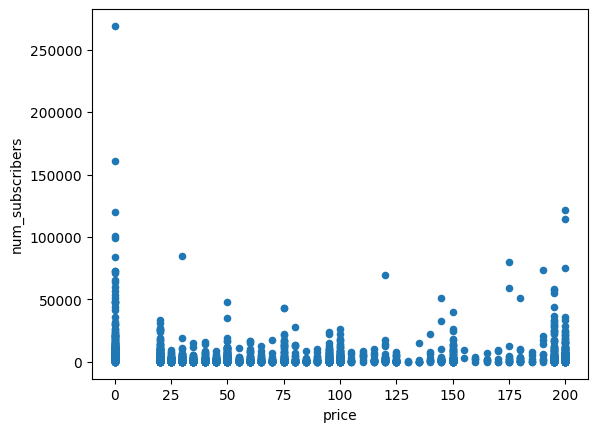

In [22]:
# Visualizamos dos variables en ScatterPlot
data.plot(x='price', y='num_subscribers', kind='scatter')


In [3]:
data

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


 # ESTIMACIONES


In [ ]:
# estimar si la media de subscribers de una asignatura es la misma que la media de subscribers de todas las asignaturas

In [26]:
data.groupby('subject')['num_subscribers'].mean()

subject
Business Finance       1563.774895
Graphic Design         1763.097844
Musical Instruments    1245.130882
Web Development        6650.476667
Name: num_subscribers, dtype: float64

In [29]:
data['num_subscribers'].mean()

3197.150625339859

In [32]:
from scipy.stats import ttest_1samp

# Definir el nombre de la categoría específica que deseas analizar
categoria_especifica = 'Graphic Design'

# Filtrar los datos de la categoría específica
grupo_especifico = data[data['subject'] == categoria_especifica]['num_subscribers']

# Calcular la media general de num_subscribers
media_general = data['num_subscribers'].mean()

# Realizar el test t para una muestra
stat, p_value = ttest_1samp(grupo_especifico, popmean=media_general)

# Mostrar resultados
print(f"Media de {categoria_especifica}: {grupo_especifico.mean():.2f}")
print(f"Media general: {media_general:.2f}")
print(f"Estadístico t: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print(f"La media de '{categoria_especifica}' es significativamente diferente de la media general.")
else:
    print(f"No hay evidencia suficiente para decir que la media de '{categoria_especifica}' es diferente de la media general.")


Media de Graphic Design: 1763.10
Media general: 3197.15
Estadístico t: -7.1528
Valor p: 0.0000
La media de 'Graphic Design' es significativamente diferente de la media general.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21848\1656741197.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='subject', y='num_subscribers', palette='Set2')


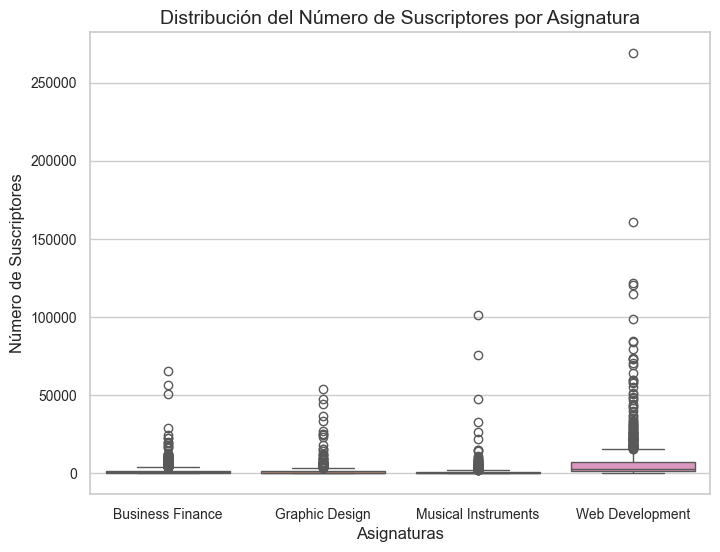

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='subject', y='num_subscribers', palette='Set2')

# Personalizar el gráfico
plt.title('Distribución del Número de Suscriptores por Asignatura', fontsize=14)
plt.xlabel('Asignaturas', fontsize=12)
plt.ylabel('Número de Suscriptores', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.show()


In [23]:
data.groupby('subject')['num_subscribers'].mean()

subject
Business Finance       1563.774895
Graphic Design         1763.097844
Musical Instruments    1245.130882
Web Development        6650.476667
Name: num_subscribers, dtype: float64

In [17]:
from scipy.stats import kruskal
import pandas as pd

# Asegúrate de que tu dataset ya está cargado en tu variable (por ejemplo, `tu_dataset`)

# Crear listas separadas para cada grupo de subjects
groups = [group['num_subscribers'].values for name, group in data.groupby('subject')]

# Realizar el test de Kruskal-Wallis
stat, p_value = kruskal(*groups)

# Mostrar resultados
print("Estadístico de Kruskal-Wallis:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos (rechazamos H0).")
else:
    print("No hay diferencias significativas entre los grupos (no se rechaza H0).")


Estadístico de Kruskal-Wallis: 1001.6004591500682
Valor p: 8.08991636213762e-217
Hay diferencias significativas entre los grupos (rechazamos H0).


In [ ]:
# Como podemos observar en el Kruskal-Wallis , el pvalor es MUY BAJO, por tanto  RECHAZAMOS  Ho
# Por tanto, concluimos con que las SUBJECT no tienen una media similar de NUM_SUBSCRIBERS 
# Al no seguir una distribución normal la variable (num_subscribers), hemos hecho la prueba KRUSKAL-WALLIS 
# Hemos visto las medias de num_subscribers en cada subject,  WEB DEVELOPMENT tiene una emdia bastante más alta

# Por tanto todas las subjects tienen una media relativamente similar, excepto WEB DEVELOPMENT que es bastante más grande

